# SLO Twitter Data Analysis  - Time Series Statistics

Setup Jupyter Notebook kernel for SLO data analysis.<br>

In [3]:
import logging as log
import warnings
import time
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Import custom utility functions.
import slo_twitter_data_analysis_utility_functions_v2 as tweet_util_v2

#############################################################
# Adjust parameters to display all contents.
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.width = None
pd.options.display.max_colwidth = 1000
# Seaborn setting.
sns.set()
# Set level of precision for float value output.
pd.set_option('precision', 12)
# Ignore these types of warnings - don't output to console.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Matplotlib log settings.
mylog = log.getLogger("matplotlib")
mylog.setLevel(log.INFO)

"""
Turn debug log statements for various sections of code on/off.
(adjust log level as necessary)
"""
log.basicConfig(level=log.INFO)


# Import CSV dataset and convert to dataframe.
tweet_dataframe = tweet_util_v2.import_dataset(
    "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/"
    "twitter-dataset-6-22-19-fixed.csv",
    "csv", False)

d:\dropbox\cs344-ai\venv3.6-64bit\lib\site-packages\IPython\core\interactiveshell.py:3209: DtypeWarning: Columns (36,48) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


## Tweet Creation Time-Date Stamp Graph:

<span style="font-family:Papyrus; font-size:1.25em;">

Plot of the year a Tweet was created against the # of Tweets created in that year.<br>

</span>

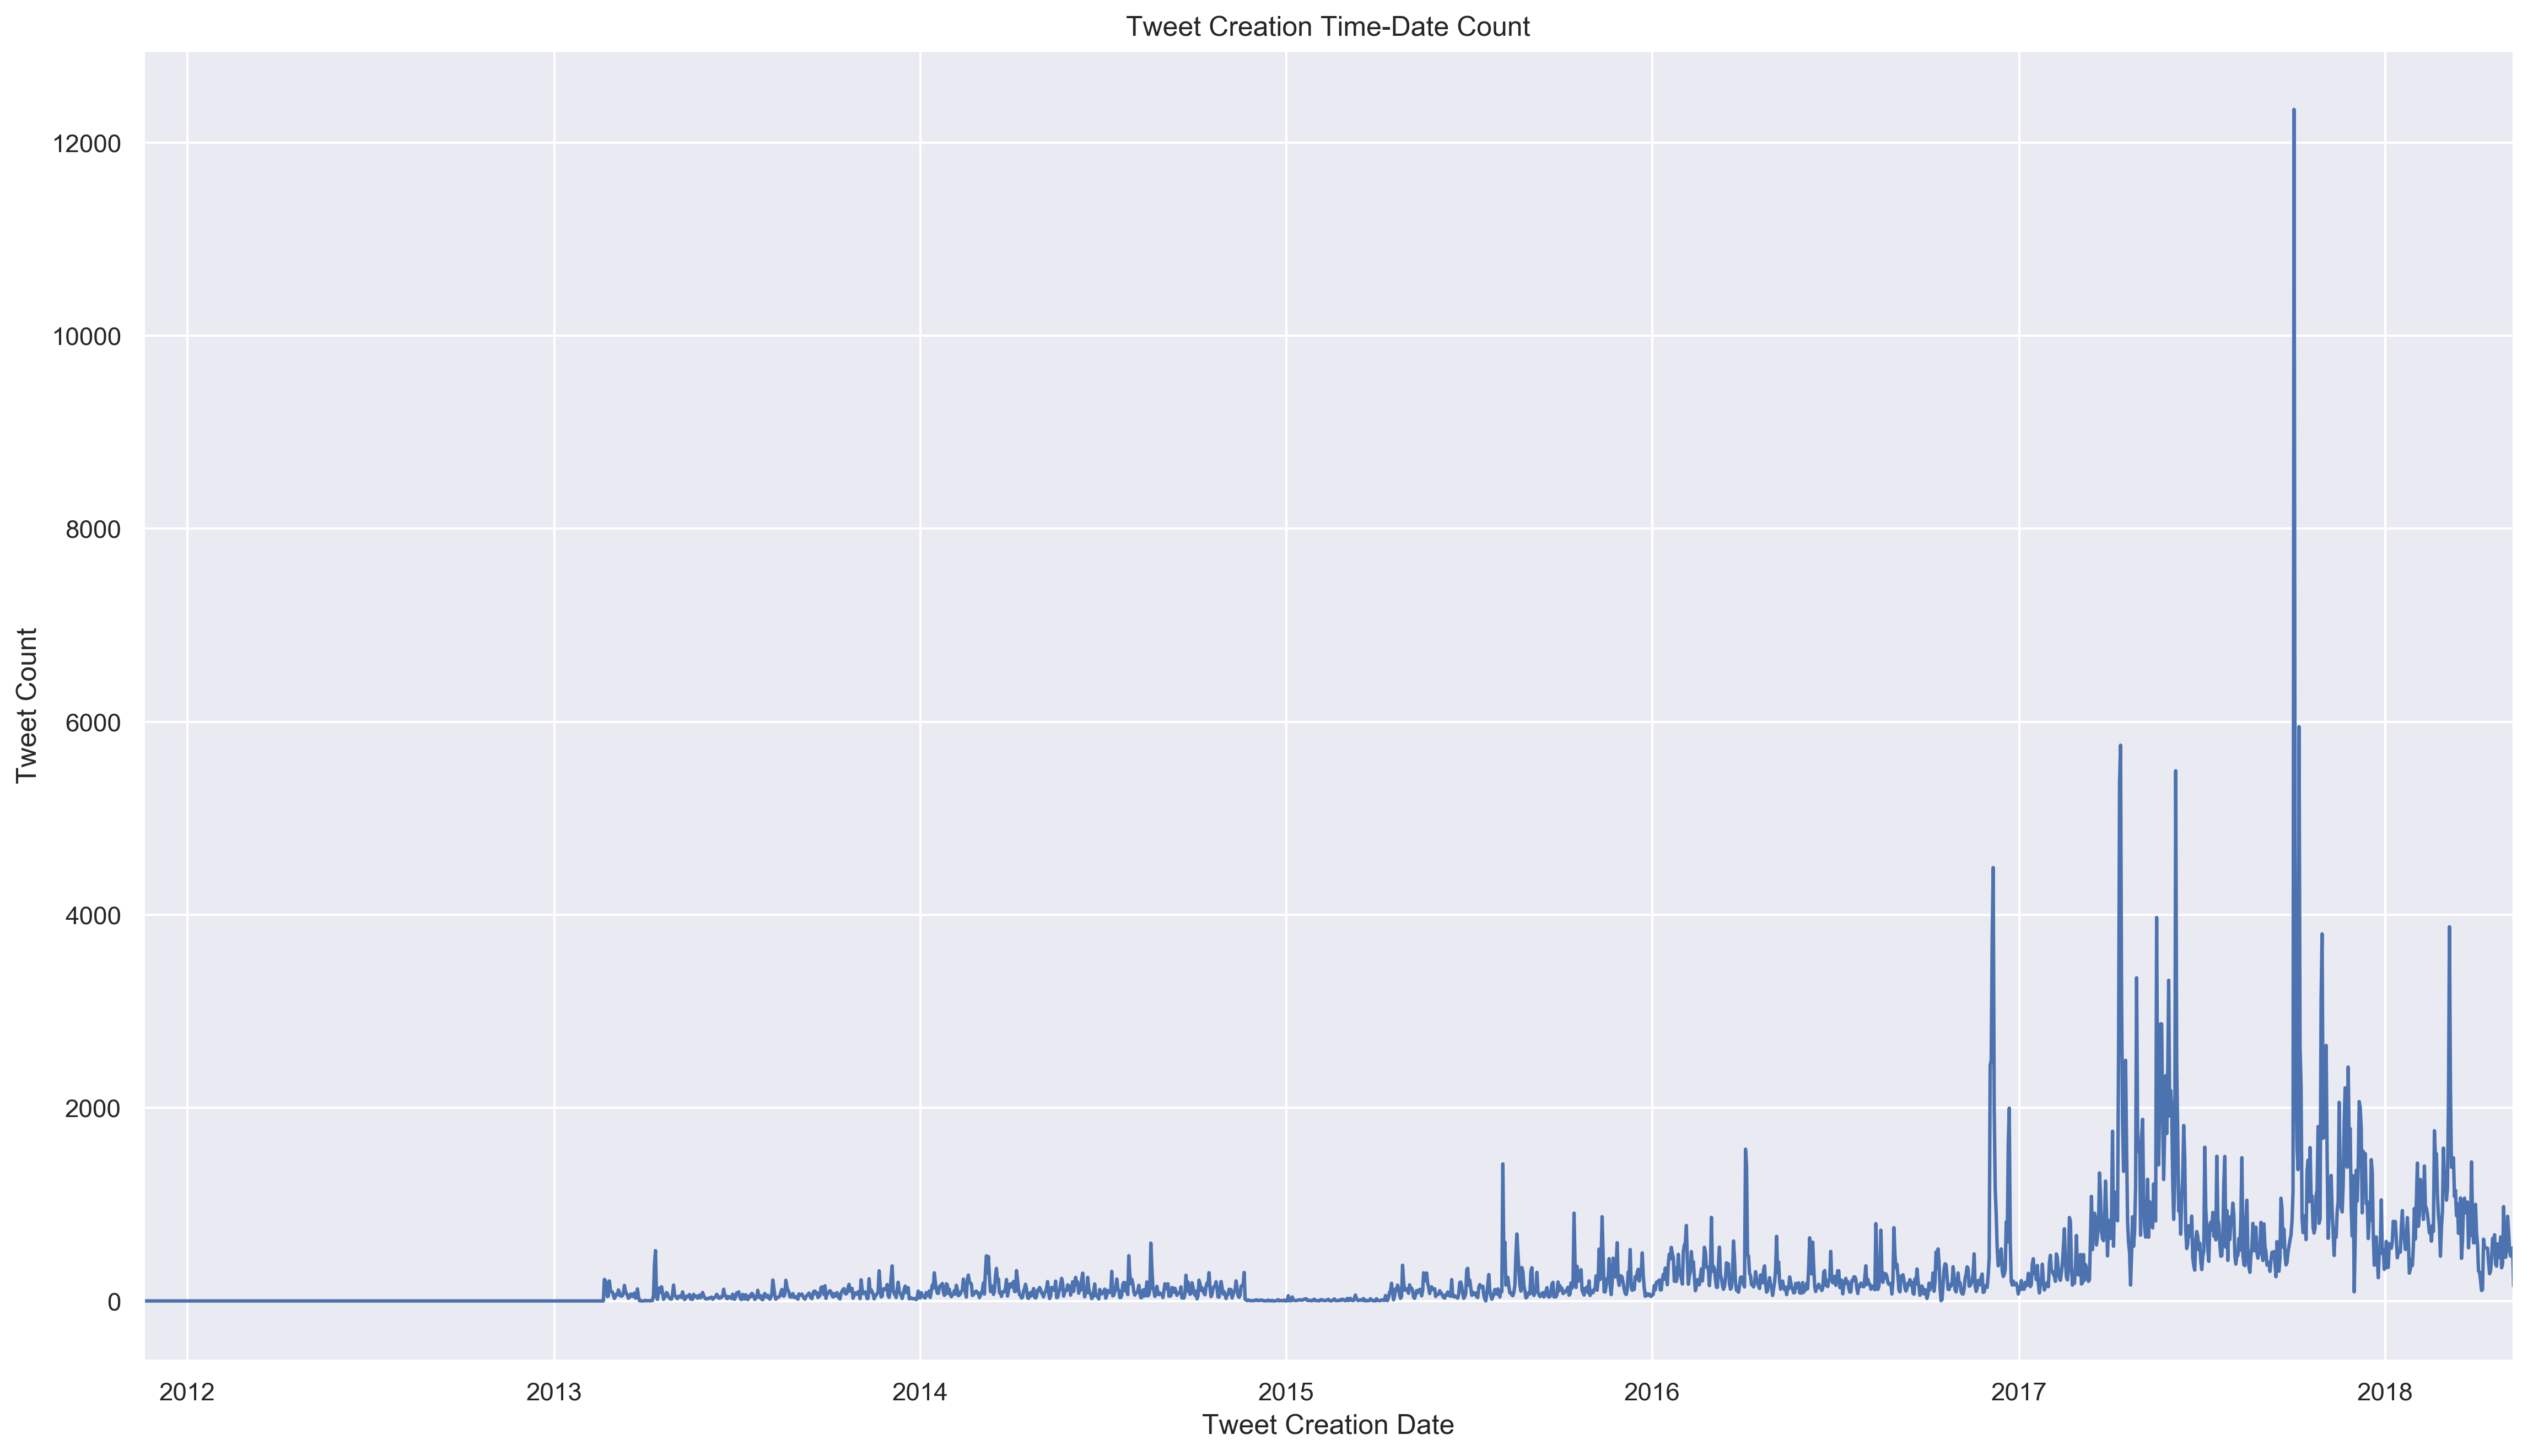

In [3]:
    plt.figure(figsize=(18.5, 10.5), dpi=300)
    plt.title(f"Tweet Creation Time-Date Count")
    plt.xlabel("Tweet Creation Date")
    plt.ylabel("Tweet Count")
    pd.to_datetime(tweet_dataframe['tweet_created_at']).value_counts().resample('1D').sum().plot()
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">

Most Tweets in our dataset are from 2017-2018.  As we go further back in time, we see substancially fewer Tweets.<br>

</span>

## Tweet Creation Time-Date Stamp by Company Graph:

<span style="font-family:Papyrus; font-size:1.25em;">

Plot of the year a Tweet was created against the # of Tweets created in that year grouped by the company the Tweet is associated with.<br>

Note:  Y-axis tick counts are NOT the same for every company.  Adani is scaled much higher than the other companies.<br>

</span>

Tweet Creation Time-Date Count by Company Association


<Figure size 432x288 with 0 Axes>

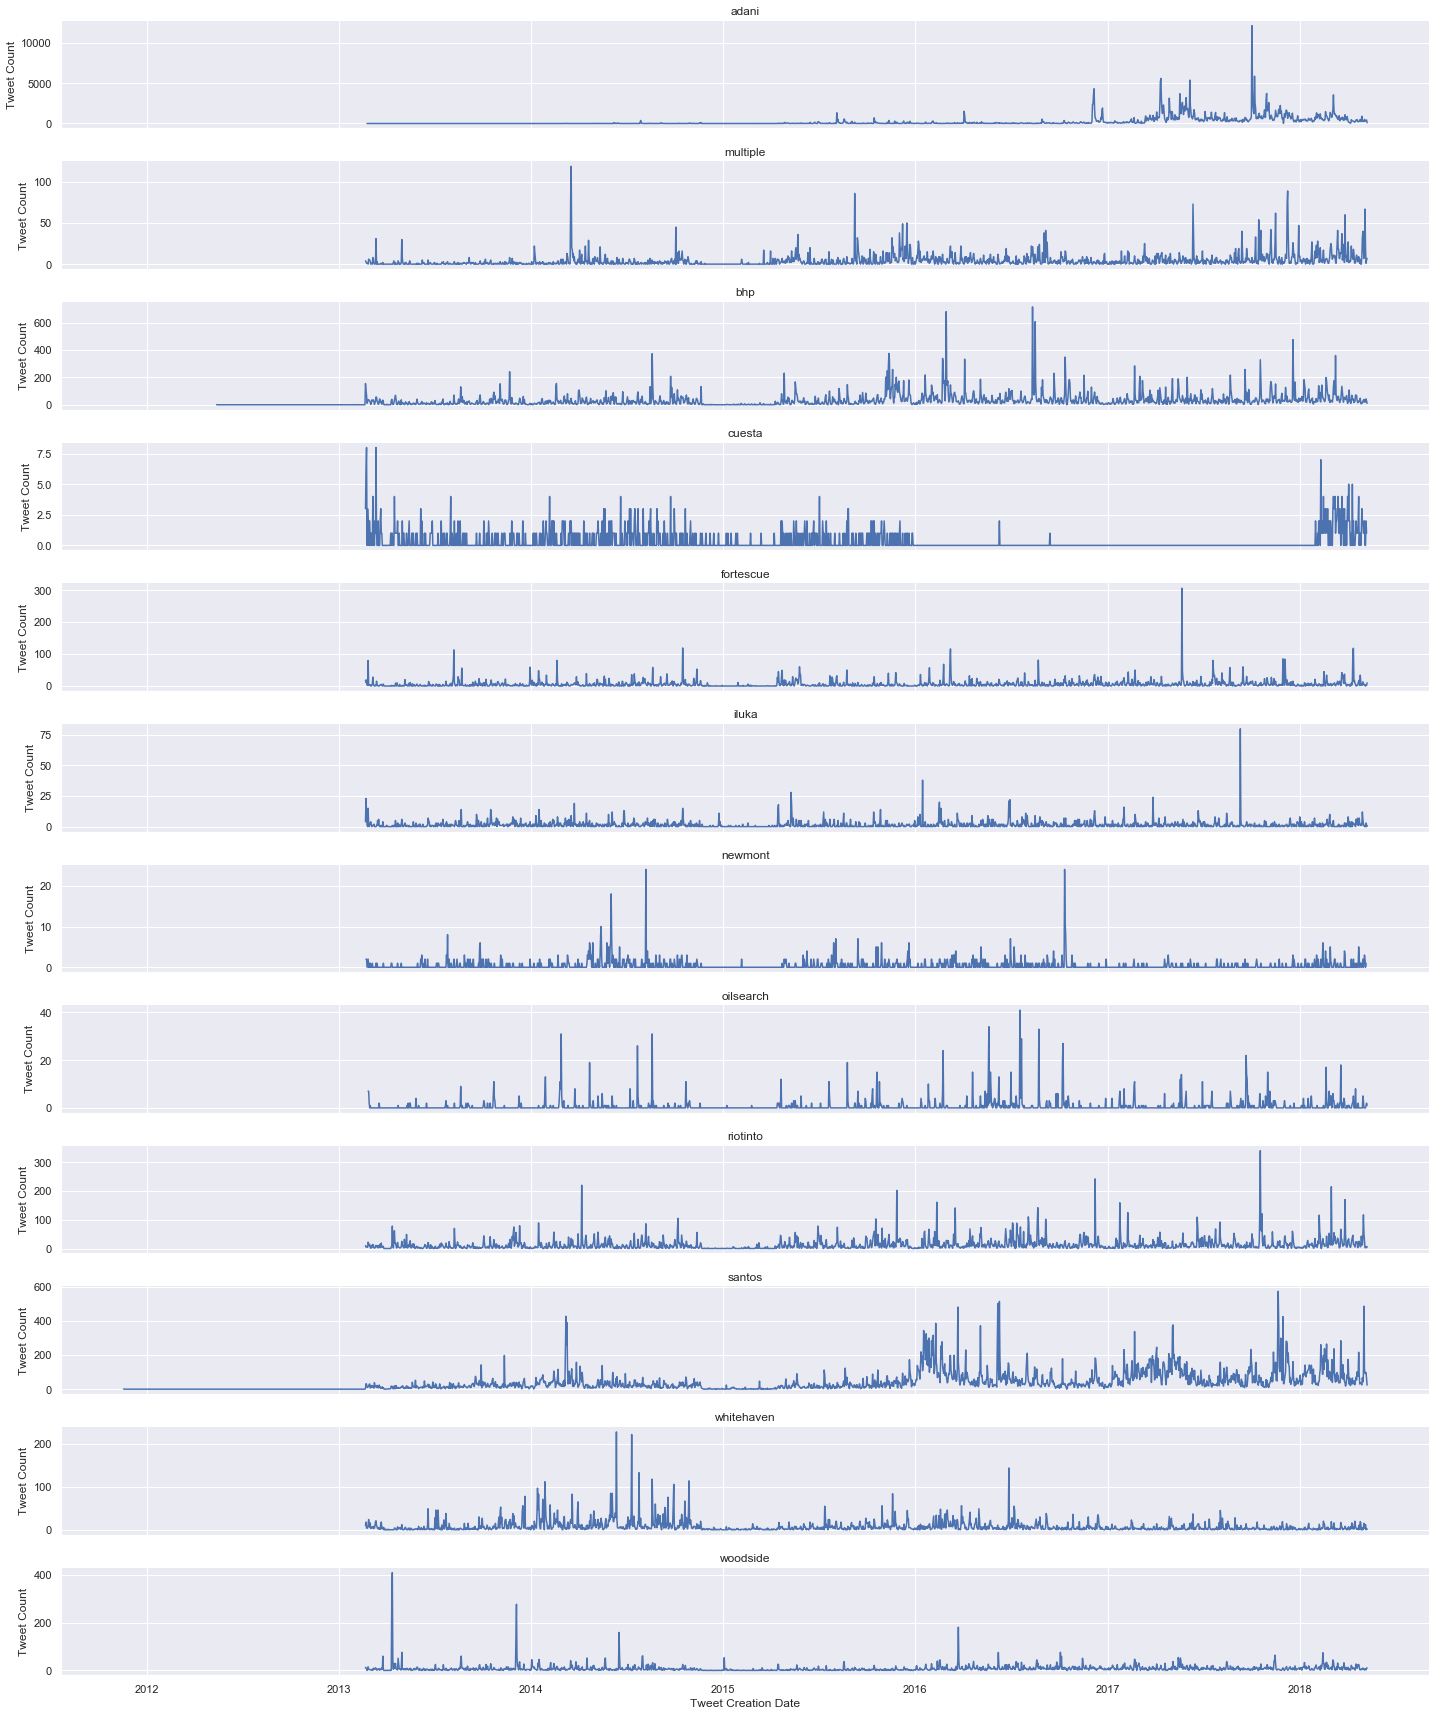

In [4]:
    plt.figure()
    print("Tweet Creation Time-Date Count by Company Association")
    grid = sns.FacetGrid(tweet_dataframe[['tweet_created_at', 'company_derived_designation']],
                         row='company_derived_designation', size=2, aspect=10, sharey=False)
    grid.map_dataframe(tweet_util_v2.ts_plot, 'tweet_created_at')
    grid.set_titles('{row_name}')
    grid.set_xlabels("Tweet Creation Date")
    grid.set_ylabels("Tweet Count")
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">

"Adani" Tweets are the most proflic and most of them are created in the 2017-2018 period.  That explains why our 1st graph was skewed heavily towards the right side.  The TWeets for the other companiees are far less numerous and don't weigh as heavily in the 1st graph.<br>

</span>

## Tweet Creation Time-Date Stamp by Company and Retweets/Non-Retweets Graph:

<span style="font-family:Papyrus; font-size:1.25em;">
    
Placeholder.

</span>

Tweet Creation Time-Date Count by Company Association and Retweeted Status


<Figure size 432x288 with 0 Axes>

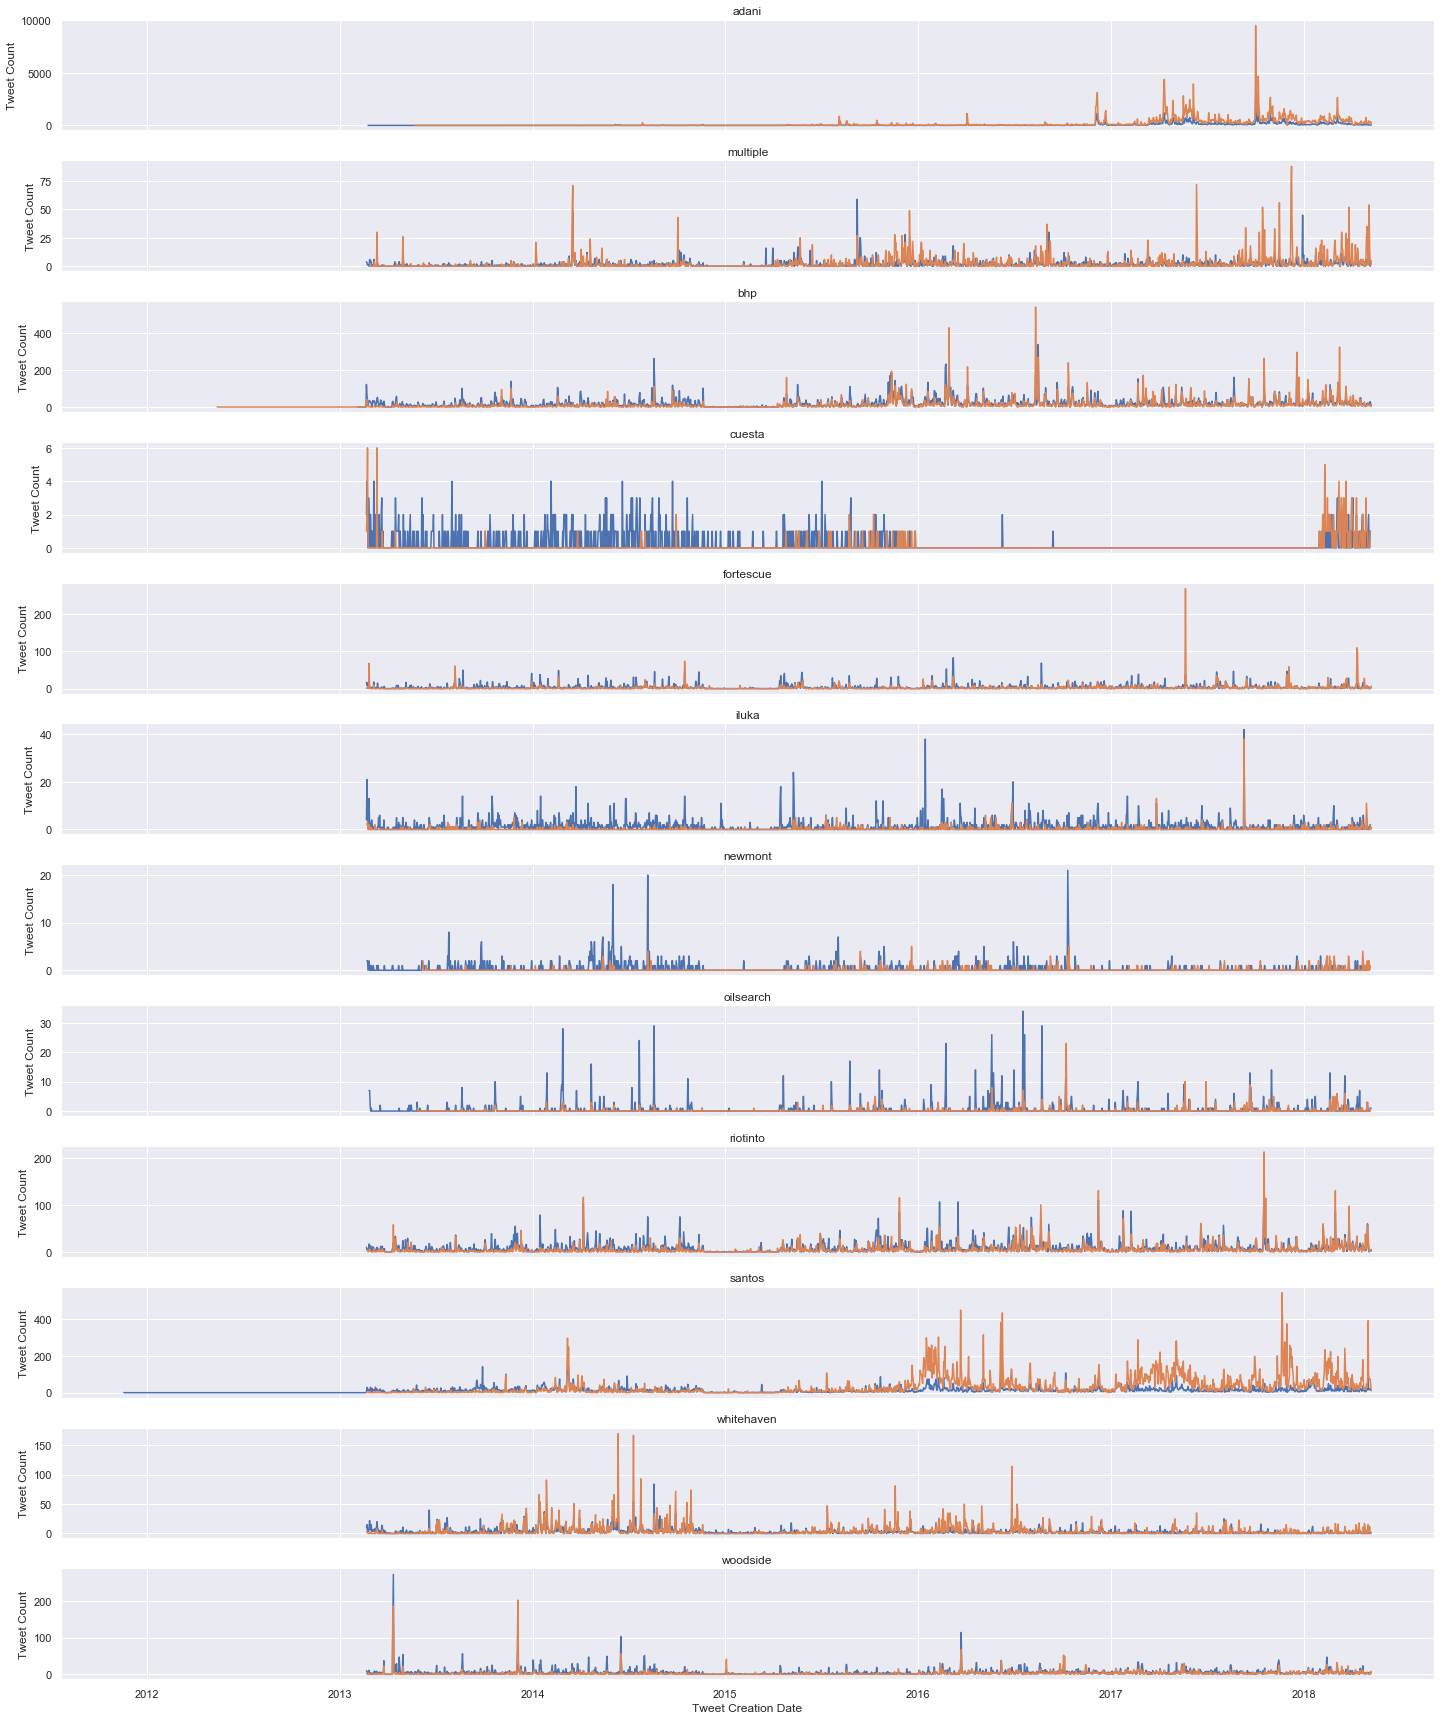

In [4]:
    plt.figure()
    print("Tweet Creation Time-Date Count by Company Association and Retweeted Status")
    grid = sns.FacetGrid(tweet_dataframe[['retweeted_derived', 'tweet_created_at', 'company_derived_designation']],
                         row='company_derived_designation', size=2, aspect=10, sharey=False)
    grid.map_dataframe(tweet_util_v2.ts_plot_2, 'tweet_created_at')
    grid.set_titles('{row_name}')
    grid.set_xlabels("Tweet Creation Date")
    grid.set_ylabels("Tweet Count")
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">

The graphs show the number of Tweets created in an particular year separate into two groups by whether they are a ReTweet or not.<br>

Orange = is a Retweet.<br>
Blue = is NOT a Retweet.<br>

**TODO: check that the interpretation is correct.**

</span>